# TF Basics

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.train import GradientDescentOptimizer

In [2]:
hello = tf.constant("Hello ")
world = tf.constant("World")

In [3]:
with tf.Session() as sess:
    res = sess.run(hello + world)
res

b'Hello World'

In [4]:
a = tf.constant(10)
b = tf.constant(20)

with tf.Session() as sess:
    res = sess.run(a + b)
res

30

In [5]:
# InteractiveSession: to use sess without the *with* statement, 
# only with Notebooks
sess = tf.InteractiveSession()

In [12]:
fill_mat = tf.fill((4, 4), 10)
fill_ones = tf.ones((4, 4))
fill_randn = tf.random_normal((4, 4))
fill_randu = tf.random_uniform((4, 4), minval=0, maxval=1)
fill_ops = [fill_mat, fill_ones, fill_randn, fill_randu]

for fill_op in fill_ops:
#     print(sess.run(fill_op))
    print(fill_op.eval())
    
mata = tf.constant([[1, 2], [3, 4]])
matb = tf.constant([[10], [100]])
print(tf.matmul(mata, matb).eval())

[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[ 0.22051685 -0.49028116  1.1717652  -1.2863343 ]
 [ 0.2383708  -0.54891205  0.3300665  -1.6979735 ]
 [ 0.13401453  0.48500395 -0.66496634  2.504814  ]
 [ 1.7277977   0.45322135 -0.74498796 -0.47506636]]
[[0.41041946 0.8530501  0.27962482 0.35964012]
 [0.92274106 0.5058706  0.9927993  0.12416065]
 [0.48526204 0.17973876 0.07888615 0.12254667]
 [0.82107544 0.5970057  0.22554171 0.01811826]]
[[210]
 [430]]


# TF Graphs

In [15]:
print(tf.get_default_graph())
g = tf.Graph()
print(g)

In [18]:
with g.as_default():
    print('Inside explicit graph selection, g is default:', g is tf.get_default_graph())
print('Outside explicit graph selection, g is default:', g is tf.get_default_graph())

Inside explicit graph selection, g is default: True
Outside explicit graph selection, g is default: False


* Aside, in python, "*is*" checks for identity (same memory item) while "*==*" checks for value

# Variables & Placeholders

* Variables: Holds weights & biases, need to be initialized
* Placeholders: Initially empty, need to be fed with data inputs, and expected *dtype* (e.g. tf.float32) need to be declared with optional shape arg

In [2]:
# Beware to call this multiple times, will result in memleak
sess = tf.InteractiveSession()

In [3]:
w_tensor = tf.random_uniform((4, 4), minval=0, maxval=1)
w_var = tf.Variable(initial_value=w_tensor)

In [15]:
# to initialize variable for it to work, 
# must call tf.global_variables_initializer() first, if not will break.
# Also for every re-run, if you run the weights var, latter will change
sess.run(tf.global_variables_initializer())

In [16]:
sess.run(w_var)

array([[0.76804173, 0.13651967, 0.7721131 , 0.53111935],
       [0.7195585 , 0.32651198, 0.19237804, 0.42989373],
       [0.9536592 , 0.42129266, 0.15818512, 0.4136641 ],
       [0.9047719 , 0.9737476 , 0.90698576, 0.6388211 ]], dtype=float32)

In [17]:
# Shape[0] is typically None, 
# since we feed unknown number of input data size
b = tf.placeholder(tf.float32, shape=(None, 5))

# Operators

In [20]:
np.random.seed(101)
tf.set_random_seed(101)

In [42]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [48]:
# Method 1 => use python operators
print(sess.run(a + b, feed_dict={a:10, b:20}))
print(sess.run(a * b, feed_dict={a:10, b:20}))
# Method 2 => use tf operators
print(sess.run(tf.add(a, b), feed_dict={a:10, b:20}))
print(sess.run(tf.multiply(a, b), feed_dict={a:10, b:20}))

30.0
200.0
30.0
200.0


# Building a Simple Linear Neural Network

=> sigma(xW + b)

In [50]:
n_features = 10
n_dense_neurons = 3

# Shape[0] = Num input sample size, Shape[1] = Num of input nodes
x = tf.placeholder(dtype=tf.float32, shape=(None, n_features))
# Each neuron has weight terms for each feature
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
# Each neuron will have 1 bias term
b = tf.Variable(tf.ones([n_dense_neurons]))

# Operations chain
xW = tf.matmul(x, W)
z = tf.add(xW, b)
a = tf.sigmoid(z)

In [51]:
sess.run(tf.global_variables_initializer())
sess.run(a, feed_dict={x:np.random.random([1, n_features])})

array([[0.25657442, 0.83892006, 0.45951933]], dtype=float32)

# Simple Regression Example

=> y = mx + c

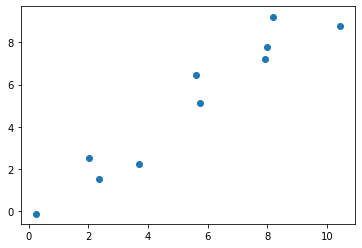

In [55]:
# Generate mock data with noise
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

plt.scatter(x=x_data, y=y_label)

In [70]:
# init m & c
m = tf.Variable(np.random.random(1).item())
c = tf.Variable(np.random.random(1).item())

In [72]:
# String up error into the DAG by operations with m, c
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m * x + c
    error += (y_hat - y) ** 2
    
optimizer = GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

W0908 23:33:54.901128 29784 deprecation.py:323] From C:\Users\tommy.yong\AppData\Local\Continuum\anaconda3\envs\learnenv\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [80]:
sess.run(tf.global_variables_initializer())
for i in range(100):
    sess.run(train)
    if i % 20 == 0:
        print(sess.run((m, c)), sess.run(error))
final_m, final_c = sess.run((m, c))

(0.8732868, 0.5934087) 8.994861
(0.87200624, 0.5187913) 8.67009
(0.88125956, 0.45255592) 8.446817
(0.8896539, 0.3924695) 8.263081
(0.89726895, 0.33796117) 8.111873


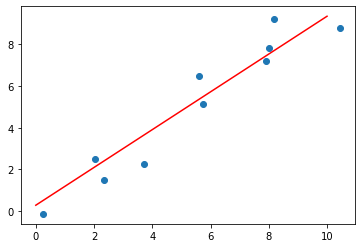

In [82]:
x_test = np.linspace(0, 10, 10)
y_test_pred = final_m * x_test + final_c

plt.scatter(x=x_data, y=y_label)
plt.plot(x_test, y_test_pred, 'r')